# Bifurications and Hysteresis 
Kaela Nelson

Vol 4A

In [13]:
import matplotlib.pyplot as plt
from scipy.optimize import newton
import numpy as np
%matplotlib inline

Recall any ordinary differential equation can be written as a first order system of ODE's, $x^{'} = F(x)$, and $x^{'} := \frac{d}{dx}x(t).$ Given a mathematical model of this form, we can understand how its solutions behave geometrically. We can convey this information in a phase portrait, which is a graph that describes the solutions with initial conditions. 

Note that to contruct a phase portrait, we must first determine the equilibirum solutions of the equation and determine their stability. It is often the case that the model we study depends on some set of paramaters, $\lambda$. Thus, our ODE becomes $x^{'} = F(x, \lambda).$ Note that as $\lambda$ vaires, the equilibrium solution and other geometric features may suddenly change. These sudden changes are bifurcation points. This lab explores and visualizes these changes in different examples of ODE's. Further mathematics behind these problems is found here: http://www.acme.byu.edu/wp-content/uploads/2017/08/Hysteresis.pdf /.

## Problem 1
Use the natural embedding algorithm to create a bifurcation diagram for the differential equation, $x^{'} = \lambda*x - x^3.$ This is called a pitchfork bifurcation (because it is shaped like a pitchfork).

In [17]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7,  maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

def F(x, lmbda):
    return lmbda*x - x**3 

# Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.linspace(5, -5, 200), np.sqrt(5), F)
# The bottom curve
C2, X2 = EmbeddingAlg(np.linspace(5, -5, 200), -np.sqrt(5), F)
#Middle Curve
C3, X3 = EmbeddingAlg(np.linspace(5, -5, 200), 0, F)

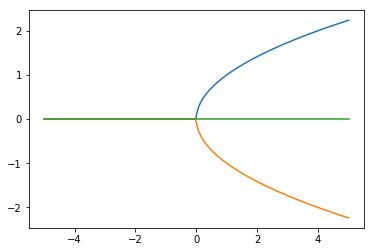

In [18]:
plt.plot(C1, X1)
plt.plot(C2, X2)
plt.plot(C3, X3)
plt.show()

## Problem 2
Create a bifurcation for the differential equation, $x^{'} = \eta +\lambda*x - x^3.$

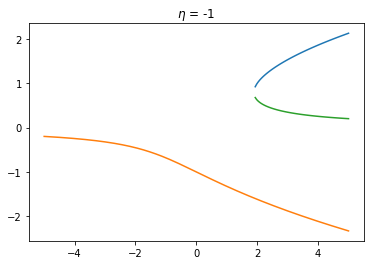

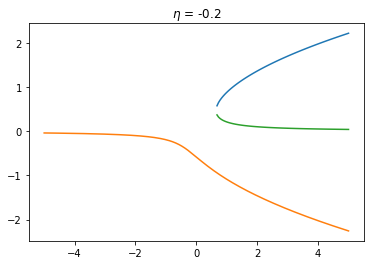

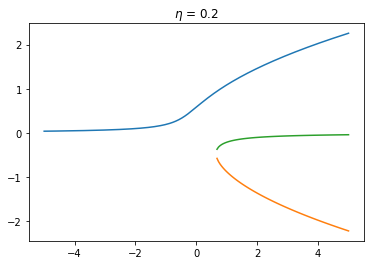

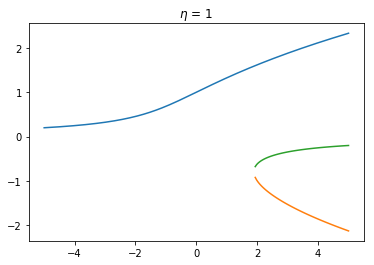

In [23]:
eta_ls = [-1, -.2, .2, 1]

for eta in eta_ls:
    def F2(x, lmbda):
        return eta + lmbda*x - x**3

    C1, X1 = EmbeddingAlg(np.linspace(5, -5, 200), np.sqrt(5), F2)
    # The bottom curve
    C2, X2 = EmbeddingAlg(np.linspace(5, -5, 200), -np.sqrt(5), F2)
    #Middle Curve
    C3, X3 = EmbeddingAlg(np.linspace(5, -5, 200), 0, F2)
    
    plt.plot(C1, X1)
    plt.plot(C2, X2)
    plt.plot(C3, X3)
    plt.title("$\eta$ = {}".format(eta))
    plt.show()

## Problem 3 (Budworm Population)
Repreoduce the bifurcation diagram for the differential equation, $\frac{dx}{d\tau} = rx(1- \frac{x}{k}) - \frac{x^2}{1 + x^2},$ where r=0.56.

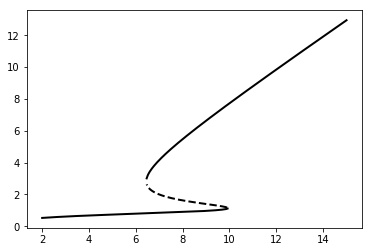

In [103]:
r = 0.56
def F3(x, k):
    return r*x*(1-x/k) - x**2/(1+x**2)

#top curve
C1, X1 = EmbeddingAlg(np.linspace(15, 6.059, 200), 10, F3)
# The bottom curve
C2, X2 = EmbeddingAlg(np.linspace(2, 10, 200), 0.5, F3)
#Middle Curve
C3, X3 = EmbeddingAlg(np.linspace(6.059, 9.9, 200)[::-1], 1.2, F3)

plt.plot(C1, X1, "k", label="stable", linewidth= 2.0)
plt.plot(C2, X2, "k", label="stable",linewidth= 2.0)
plt.plot(C3, X3, "k--", label="unstable",linewidth= 2.0)
plt.legend
plt.show()